#Домашнее задание 5 (30 + 25 = 55 pts )
## Файзуллов Айрат

# Задача 1 (30 pts)

(5 pts) Докажите, что $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$, если $\mathrm{vec}(X)$ векторизация матрицы по столбцам. Что и почему изменится, если использовать векторизацию по строкам? 

Доказать, что $vec(AXB) = (B^T ⨂ A)\cdot vec(X)$ \\
$X^{l \times n}, B^{n \times m}, A^{r \times l}$ \\
Запишем матрицу X через столбцы как $X=[x_1, x_2, ..., x_n]$ \\
Рассмоотрим k-ый столбец матрицы $AXB$ \\
$(AXB)_k = A \sum_{i=1}^{n}x_ib_{i, k} = [b_{1, k}A, ..., b_{m, k}A]\cdot [x_1, x_2, ..., x_m]^T = [b_k^T ⨂ A]vec(X)$, где $b_k$ - k-ый столбец матрицы $B$ \\
производя те же действя для всех столбцов матрицы $AXB$ получим \\
$vec(AXB) = \begin{pmatrix}
b_1^T ⨂ A \\
... \\
b_n^T ⨂ A
\end{pmatrix} \cdot vec(X) ⇒ vec(AXB) = (B^T ⨂ A)\cdot vec(X)$ 





(2 pts) Какова сложность наивного вычисления $(A \otimes B) x$ и почему она такова? Покажите, как она может быть снижена.

Даны матрицы: $A^{m \times n}, B^{l \times r}$ $$A ⨂ B = \begin{pmatrix}
a_{11}B & ... & a_{1n}B \\
& ... & \\
a_{m1}B & ... & a_{mn}B
\end{pmatrix} $$ получаем матрицу размера $ml \times nr$. Значит наивное вычисление $(A ⨂ B)x$ оценивается как $O(mlnr)$ \\
Снизим сложность вычисления: \\
Разобъем вектор $x$ на n равных частей, каждая из которых обладает длиной l. Каждую часть умножим на матрицу $B$. Получившиеся вектора длины $l$ умножим на коэффициенты матрицы $A$ и сложим эти вектора. Таким образом первый шаг у нас займет $O(lrn)$, а второй шаг зайем по времени $O(mnl)$. Общая сложность по времени составит: $O(lrn + mnl)$


(3 pts) Пусть матрицы $A$ и $B$ имеют спектральные разложения $A = S_A\Lambda_A S_A^{-1}$ и $B = S_B\Lambda_B S^{-1}_B$. Найдите собственные векторы и собственные значения у матрицы $A\otimes I + I \otimes B$.

Empty

 (10 pts) Пусть $A = \mathrm{diag}\left(\frac{2}{1000},\frac{3}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Оцените аналитически число итераций необходимых для решения линейной системы с матрицей $A$ с относительной точностью $10^{-5}$ используя
    - метод Ричардсона с оптимальным параметром (используйте евклидову норму)
    - метод Чебышёва (используйте евклидову норму)
    - метод сопряжённых градиентов (используйте $A$-норму).
    
и сравните вашу оценку с экспериментальными результатами.

Создадим матрицу А

In [32]:
import numpy as np
a = np.arange(0.002, 1, 0.001)
a = np.append(a, [1, 1000])
A = np.diag(a)
print(A)
print(A.shape)

[[2.00e-03 0.00e+00 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 3.00e-03 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 4.00e-03 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [0.00e+00 0.00e+00 0.00e+00 ... 9.99e-01 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 ... 0.00e+00 1.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 ... 0.00e+00 0.00e+00 1.00e+03]]
(1000, 1000)


Создадим вектор x, который будет являть эталонным решением

In [33]:
check = np.ones(1000)


Воспользуемся методом Ричардсона

Определим $τ = \frac{2}{λ_{max} + λ_{min}}$ \\
и решение будем приближать по методу $x_{k+1} = x_{k} - τ(Ax_k - x_{original})$


Точность решение в $10^{-5}$ будет достигаться за $\frac{ln(10^{-5} - ln||e_0||)}{ln(\frac{λ_{max} - λ_{min}}{λ_{max} + λ_{min}})}$, что даёт оценку как $10^6$

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline


x = np.zeros(1000)
tau = 2.0 / (A[0, 0] + A[999, 999])

res_richardson = []
check_miss = 10
while check_miss > 1e-5:
    miss = A.dot(x) - check
    x = x - tau * miss
    check_miss = np.linalg.norm(miss)
    res_richardson.append(check_miss)

Видим, что было совершено около 3*$10^6$ операций

In [76]:
print(len(res_richardson))

2964877


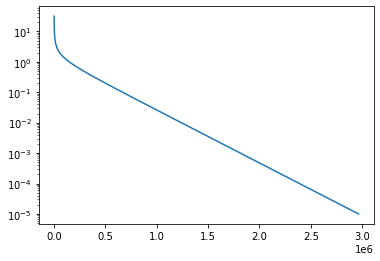

In [82]:
plt.plot(res_richardson)
plt.yscale("log")

Асимптотически можно оценить, что на подсчёт решения нам придется тратить $10^6$ операций

Воспользуемся методом Чебышёва

Будем выбирать $\tau_i$ на каждом шаге: $τ_i = \frac{2}{λ_{max} + λ_{min} - (λ_{max} - λ_{min})x_i}$

Воспользуемся перестановками, т.к. иначе решение не будет сходиться 

In [110]:
# Использовал основу кода с лекций
niters = 2**13
roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(niters)]
taus = [(A[999, 999] + A[0, 0] - (A[0, 0] - A[999, 999]) * r) / 2 for r in roots]
x = np.zeros(1000)
r = A.dot(x) - check
res_cheb_even = [np.linalg.norm(r)]

def leb_shuffle_2n(n):
    if n == 1:
        return np.array([0,], dtype=int)
    else:
        prev = leb_shuffle_2n(n // 2)
        ans = np.zeros(n, dtype=int)
        ans[::2] = prev
        ans[1::2] = n - 1 - prev
        return ans

good_perm_even = leb_shuffle_2n(niters)

for i in range(niters):
    x = x - 1.0/taus[good_perm_even[i]] * r
    r = A.dot(x) - check
    miss_check = np.linalg.norm(r)
    res_cheb_even.append(miss_check)
    if miss_check < 1e-5:
      break

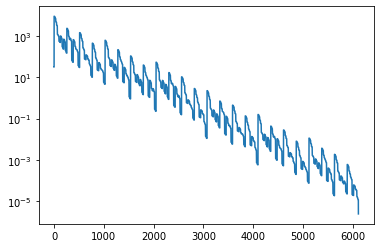

In [111]:
plt.semilogy(res_cheb_even)

Видим, что было совершено около 6000 операций. \\
Асимптотически можно оценить, что на подсчет уйдет $10^3$ операций

Метод сопряжённых градиентов

$x_{i+1} = x_{i} + α_{i}\cdot p_{i}$

In [118]:
import scipy.sparse.linalg as spla

res = []
def put_res(x):
  res.append(np.linalg.norm(A.dot(x) - check))

ans = spla.cg(A, check, tol=1e-8, atol=1e-5, callback=put_res, maxiter=1000)

Асимптотически должна быть сходимость как в методе Чебышёва, но с меньшей константой

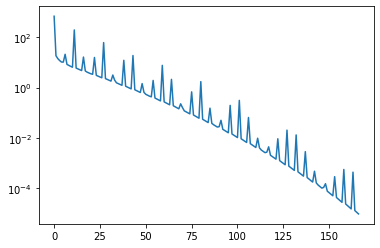

In [119]:
plt.semilogy(res)

Видим, что понадобилось около 200 операций. Асимптотически можно оценить, что на подсчёт уйдет $10^2$ операций

(5 pts) Рассмотрим систему линейных уравнений вида $(I + uu^{\top})x = b$, $u \neq 0$. За сколько итераций сойдётся метод сопряжённых градиентов для этой системы? Получите ответ аналитически, после чего приведите экспериментальное подтверждение его правильности.

In [130]:
u = np.random.rand(1000)[np.newaxis].T
A = np.eye(1000) + u @ u.T

res = []
def put_res(x):
  res.append(np.linalg.norm(A.dot(x) - check))

ans = spla.cg(A, check, tol=1e-8, atol=1e-5, callback=put_res, maxiter=1000)


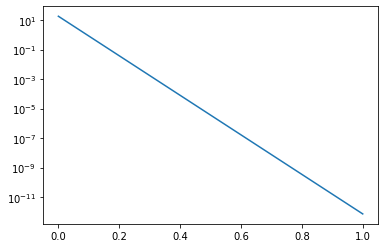

In [131]:
plt.semilogy(res)

Видим, что результат с нужной оценкой получили за за 1 итерацию. Это проищошла, т.к. у матрицы число обусловленности было равно 1, что показывает, что решение полуим после одной итерации.

(5 pts) Покажите, как связан детерминант матрицы
$$
\begin{bmatrix}
x & 1 & 0 & \ldots & 0\\
1 & 2x & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & 2x & 1 \\
0 & 0 & \ldots & 1 & 2x
\end{bmatrix}
$$

с полиномом Чебышёва степени $n$

Запишем полином Чебышева: $T_n(x) = 2xT_{n-1}(x) - T_{n-2}(x), T_0(x)=1, T_1(x)=x$ \\
Если рассмотерть определитель заданной матрицы, то можно заметить закономерность для определительей различного порядка, что $Det_n = 2xDet_{n-1} - Det_{n-2}$ и $Det_1 = x$. Видно полную аналогию с полиномом Чебышёва, таким образом детерминант заданной матрицы и полином свзяаны.